In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

params_dict = {
    'font.size' : 12,
    'axes.labelsize': 'medium',
    'xtick.top' : True,
    'ytick.right' : True,
    'axes.labelsize' : 16,
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,
    'xtick.top' : True,
    'ytick.right' : True,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'legend.frameon' : True,
    'svg.fonttype' : 'none',
    'pdf.fonttype' : 42,
    'savefig.transparent' : True
}
plt.rcParams.update(params_dict)
save_dir = os.path.join(os.getcwd(), 'figs_python')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
print(f' Figures will be saved in this folder:\n {save_dir}')

 Figures will be saved in this folder:
 \\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\Manuscript\Nature\ResearchData\figs_python


## fit function

In [2]:
def gaussian_bg(x, mu, sigma, amplitude, background):
    return amplitude * np.exp(-((x - mu) / sigma)**2 / 2) + background

def _3_gaussian(x, mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3):
    return (a1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) +
            a2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2)) +
            a3 * np.exp(-(x - mu3)**2 / (2 * sigma3**2)))

def fit_3_gaussians(x, y, _p0=None):
    # Initial guesses for parameters
    mu1 = np.mean(x)
    sigma1 = np.std(x)
    mu2 = np.mean(x)
    sigma2 = np.std(x)
    mu3 = np.mean(x)
    sigma3 = np.std(x)
    a1 = max(y)
    a2 = max(y)
    a3 = max(y)
    
    params, cov = curve_fit(_3_gaussian, x, y, p0=_p0)
    mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3 = params
    return mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3

# # Example usage
# x = np.linspace(0, 10, 100)
# y = _3_gaussian(x, 2, 1, 4, 2, 6, 1, 10, 5, 8)
# mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3 = fit_3_gaussians(x, y)

# plt.plot(x, y, '*', label='data')
# plt.plot(x, _3_gaussian(x, mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3), label='fit')
# plt.legend()
# plt.show()


## Read, fit and plot massphotometry data

In [3]:
df_fig4f_top = pd.read_csv("Mass Photometry\Fig4f\Fig4f_Top.csv" ).dropna()
df_fig4f_mid = pd.read_csv("Mass Photometry\Fig4f\Fig4f_Middle.csv" ).dropna()
df_fig4f_bot = pd.read_csv("Mass Photometry\Fig4f\Fig4f_Bottom.csv" ).dropna()
df_fig4f_top.head()

,frame_indices,x_coords,y_coords,contrasts,masses_kDa,fit_errors,diffblur_errors,neareast_neighbour_distances,selections
0,1.000000000000000000e+01,81.382087,25.380109,-0.008881,487.792638,0.061919,0.0,27.681087,1.0
1,1.000000000000000000e+01,166.770472,39.370893,-0.010162,558.180794,0.077219,0.0,20.072731,1.0
2,1.000000000000000000e+01,16.666469,138.638190,-0.007495,411.638653,0.092903,0.0,22.541695,1.0
3,1.000000000000000000e+01,111.950715,141.631846,-0.005873,322.494158,0.125131,0.0,9.689474,1.0
4,1.100000000000000000e+01,173.210265,119.455757,-0.009595,527.044989,0.066570,0.0,10.648333,1.0


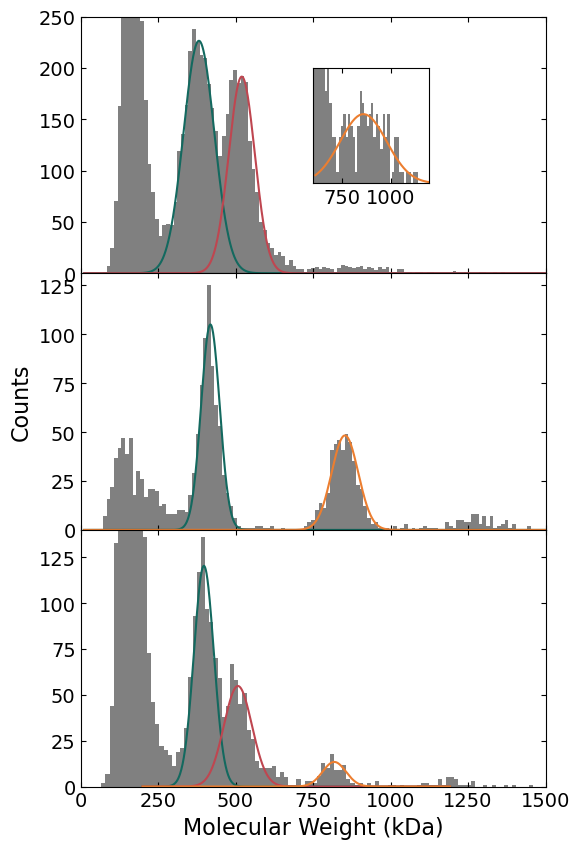

In [4]:
fig = plt.figure(figsize=(6, 10))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True)
_bins = 125
_color = 'gray'
_color_p1 = "#13695f"
_color_p2 = "#bf4650"
_color_p3 = "#ec7e30"

n, bin_top, _ = axs[0].hist(df_fig4f_top["masses_kDa"], bins=_bins, range= (0, 1500), color=_color)
axs[0].set_ylim(0, 250)
x = bin_top[1:]; y = n
_p0=[150, 50, 400, 60, 500, 80, 200, 100, 50]
mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3 = fit_3_gaussians(x, y, _p0=_p0)
# axs[0].plot(x, gaussian_bg(x, mu1, sigma1, a1, 0), color='magenta')
x_sim = np.linspace(x.min(), x.max(), 1000)
axs[0].plot(x_sim, gaussian_bg(x_sim, mu2, sigma2, a2, 0), color=_color_p1)
axs[0].plot(x_sim, gaussian_bg(x_sim, mu3, sigma3, a3, 0), color=_color_p2)

axins = axs[0].inset_axes([0.5, 0.35, 0.25, 0.45])
n, bin_top, _ = axins.hist(df_fig4f_top["masses_kDa"], bins=50, range= (600, 1200), color=_color);
x = bin_top[1:]; y = n
axins.plot(x, gaussian_bg(x, 860, 120, 6, 0), color=_color_p3)
axins.set_yticks([])
axins.set_xlim(600, 1200)
axins.set_ylim(0, 10)

n, bin_top, _ = axs[1].hist(df_fig4f_mid["masses_kDa"], bins=_bins, range= (0, 1500), color=_color);
x = bin_top[1:]; y = n
_p0=[150, 50, 400, 60, 500, 80, 200, 100, 50]
mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3 = fit_3_gaussians(x, y, _p0=_p0)
x_sim = np.linspace(x.min(), x.max(), 1000)
axs[1].plot(x_sim, gaussian_bg(x_sim, mu2, sigma2, a2, 0), color=_color_p1)
axs[1].plot(x_sim, gaussian_bg(x_sim, mu3, sigma3, a3, 0), color=_color_p3)

n, bin_top, _ = axs[2].hist(df_fig4f_bot["masses_kDa"], bins=int(0.9*_bins), range= (0, 1500), color=_color);
x = bin_top[1:]; y = n
bool = (x > 300) & (x < 1200)
x = x[bool]; y = y[bool]
_p0=[400, 100, 550, 60, 800, 30, 100, 70, 50]
mu1, sigma1, mu2, sigma2, mu3, sigma3, a1, a2, a3 = fit_3_gaussians(x, y, _p0=_p0)
x_sim = np.linspace(200, x.max(), 1000)
axs[2].plot(x_sim, gaussian_bg(x_sim, mu1, sigma1, a1, 0), color=_color_p1)
axs[2].plot(x_sim, gaussian_bg(x_sim, mu2, sigma2, a2, 0), color=_color_p2)
axs[2].plot(x_sim, gaussian_bg(x_sim, mu3, sigma3, a3, 0), color=_color_p3)


axs[1].set_ylabel("Counts")
axs[2].set_ylim(0, 140)
axs[2].set_xlim(0, 1500)
axs[2].set_xlabel("Molecular Weight (kDa)")

plt.savefig(os.path.join(save_dir, 'Fig4f.svg'), dpi=300)